# Cohort Analysis on an e-Commerce Website

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [61]:
orders=pd.read_csv('orders.csv')
orders.head()

,id,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False


## Table Preparation

### Create a Order Period column based on order date

In [62]:
#create a date column on a monthly basis
orders['order_time']=pd.to_datetime(orders['order_time'])
orders['order_period']=orders.order_time.apply(lambda x: datetime.strftime(x,'%Y-%m'))
orders.head()

,id,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,order_period
0,1,9852,2016-01-01 00:03:11,60.69,10,NaN,False,2016-01
1,2,2784,2016-01-01 00:09:32,123.91,15,NaN,False,2016-01
2,3,1619,2016-01-01 00:17:26,119.75,15,NaN,False,2016-01
3,4,9725,2016-01-01 00:44:04,151.92,15,NaN,False,2016-01
4,5,8892,2016-01-01 00:52:23,153.27,15,NaN,False,2016-01


### Create Cohort Group column based on their first order

In [63]:
orders.set_index('user_id',inplace=True)
orders['cohort_group']=orders.groupby(level=0)['order_time'].min().apply(lambda x: datetime.strftime(x,'%Y-%m'))
orders.reset_index(inplace=True)
orders.head()

,user_id,id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,order_period,cohort_group
0,9852,1,2016-01-01 00:03:11,60.69,10,NaN,False,2016-01,2016-01
1,2784,2,2016-01-01 00:09:32,123.91,15,NaN,False,2016-01,2016-01
2,1619,3,2016-01-01 00:17:26,119.75,15,NaN,False,2016-01,2016-01
3,9725,4,2016-01-01 00:44:04,151.92,15,NaN,False,2016-01,2016-01
4,8892,5,2016-01-01 00:52:23,153.27,15,NaN,False,2016-01,2016-01


### Aggregate date by Cohort Group and Order Period

In [68]:
grouped = orders.groupby(['cohort_group','order_period'])
cohorts = grouped.agg({'user_id': pd.Series.nunique, 'id': pd.Series.nunique, 'item_total': np.sum})
cohorts.rename(columns={'user_id': 'Total_Users','id':'Total_Orders','item_total':'Total_Sales'},inplace=True)
cohorts.head()

Total_Users  Total_Sales  Total_Orders
cohort_group order_period                                        
2016-01      2016-01              3072    546138.01          4319
             2016-02              1285    245181.32          1939
             2016-03              1369    269158.65          2120
             2016-04              1326    250635.78          1996
             2016-05              1349    262913.30          2100

### Label the Cohort Period for each Cohort Group

In [69]:
def cohort_period (df):
    df['Cohort_Period'] = np.arange(len(df)) + 1
    return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

Total_Users  Total_Sales  Total_Orders  \
cohort_group order_period                                           
2016-01      2016-01              3072    546138.01          4319   
             2016-02              1285    245181.32          1939   
             2016-03              1369    269158.65          2120   
             2016-04              1326    250635.78          1996   
             2016-05              1349    262913.30          2100   

                           Cohort_Period  
cohort_group order_period                 
2016-01      2016-01                   1  
             2016-02                   2  
             2016-03                   3  
             2016-04                   4  
             2016-05                   5

## Calculate Retention by Cohort Group

In [71]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group','Cohort_Period'],inplace=True)

cohort_group_size = cohorts['Total_Users'].groupby(level=0).first()
cohort_group_size.head()

cohort_group
2016-01    3072
2016-02    1678
2016-03    1152
2016-04     771
2016-05     591
Name: Total_Users, dtype: int64

In [72]:
cohorts['Total_Users'].head()

cohort_group  Cohort_Period
2016-01       1                3072
              2                1285
              3                1369
              4                1326
              5                1349
Name: Total_Users, dtype: int64

In [73]:
cohorts['Total_Users'].unstack(0)

cohort_group,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
Cohort_Period,,,,,,,,,,,,
1,3072.0,1678.0,1152.0,771.0,591.0,441.0,357.0,326.0,225.0,201.0,148.0,153.0
2,1285.0,625.0,346.0,182.0,150.0,91.0,74.0,48.0,38.0,30.0,23.0,NaN
3,1369.0,582.0,371.0,202.0,138.0,91.0,99.0,56.0,32.0,26.0,NaN,NaN
4,1326.0,626.0,363.0,197.0,125.0,91.0,74.0,50.0,35.0,NaN,NaN,NaN
5,1349.0,576.0,347.0,223.0,135.0,101.0,77.0,52.0,NaN,NaN,NaN,NaN
6,1326.0,618.0,348.0,208.0,142.0,88.0,64.0,NaN,NaN,NaN,NaN,NaN
7,1343.0,612.0,365.0,173.0,137.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1357.0,611.0,363.0,204.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1383.0,598.0,345.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
user_retention = cohorts['Total_Users'].unstack(0).divide(cohort_group_size,axis=1)
user_retention

cohort_group,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
Cohort_Period,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.418294,0.372467,0.300347,0.236057,0.253807,0.206349,0.207283,0.147239,0.168889,0.149254,0.155405,NaN
3,0.445638,0.346841,0.322049,0.261997,0.233503,0.206349,0.277311,0.171779,0.142222,0.129353,NaN,NaN
4,0.431641,0.373063,0.315104,0.255512,0.211506,0.206349,0.207283,0.153374,0.155556,NaN,NaN,NaN
5,0.439128,0.343266,0.301215,0.289235,0.228426,0.229025,0.215686,0.159509,NaN,NaN,NaN,NaN
6,0.431641,0.368296,0.302083,0.269780,0.240271,0.199546,0.179272,NaN,NaN,NaN,NaN,NaN
7,0.437174,0.364720,0.316840,0.224384,0.231810,0.217687,NaN,NaN,NaN,NaN,NaN,NaN
8,0.441732,0.364124,0.315104,0.264591,0.238579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.450195,0.356377,0.299479,0.261997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize results

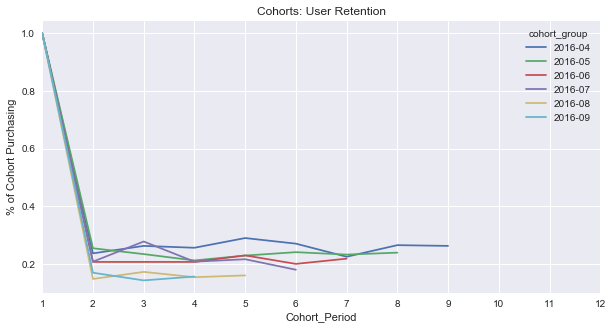

In [80]:
user_retention[['2016-04', '2016-05', '2016-06','2016-07','2016-08','2016-09']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

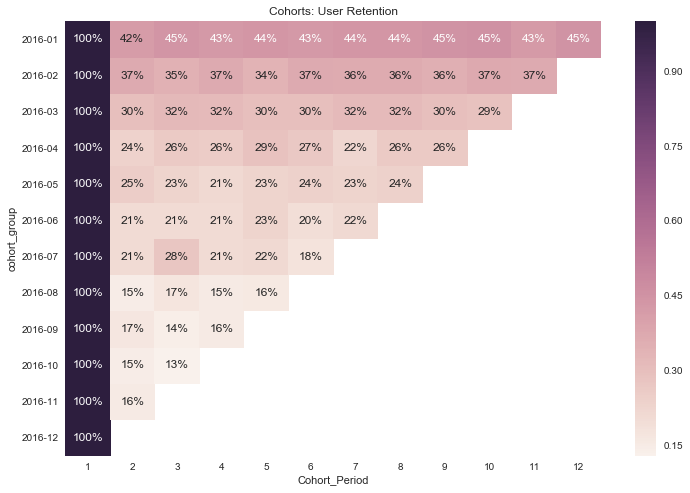

In [81]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');